# Prediction (out of sample)

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm

plt.rc("figure", figsize=(16, 8))
plt.rc("font", size=14)

## Artificial data

In [3]:
nsample = 50
sig = 0.25
x1 = np.linspace(0, 20, nsample)
X = np.column_stack((x1, np.sin(x1), (x1 - 5) ** 2))
X = sm.add_constant(X)
beta = [5.0, 0.5, 0.5, -0.02]
y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)

## Estimation 

In [4]:
olsmod = sm.OLS(y, X)
olsres = olsmod.fit()
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     1370.
Date:                Tue, 16 Jul 2024   Prob (F-statistic):           5.62e-45
Time:                        07:37:13   Log-Likelihood:                 11.523
No. Observations:                  50   AIC:                            -15.05
Df Residuals:                      46   BIC:                            -7.398
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.0885      0.068     74.518      0.0

## In-sample prediction

In [5]:
ypred = olsres.predict(X)
print(ypred)

[ 4.61208866  5.08325599  5.51559376  5.88195861  6.16500308  6.36002573
  6.47574362  6.53286006  6.56066314  6.59221379  6.65891397  6.78534737
  6.98524044  7.25920712  7.59464801  7.9678204   8.34773913  8.70126735
  8.99856086  9.21797136  9.34960326  9.39693945  9.37626913  9.31401148
  9.24237511  9.19406623  9.19691517  9.26930389  9.41714589  9.63291464
  9.89688016 10.18035063 10.45038633 10.67521157 10.82943535 10.898223
 10.87973351 10.78542198 10.6381576  10.46846627 10.30951532 10.19166419
 10.13747648 10.15801277 10.25101346 10.40126996 10.58312346 10.76468057
 10.91305333 10.99976261]


## Create a new sample of explanatory variables Xnew, predict and plot

In [6]:
x1n = np.linspace(20.5, 25, 10)
Xnew = np.column_stack((x1n, np.sin(x1n), (x1n - 5) ** 2))
Xnew = sm.add_constant(Xnew)
ynewpred = olsres.predict(Xnew)  # predict out of sample
print(ynewpred)

[10.99452521 10.85820526 10.61033444 10.29542301  9.97206209  9.69857857
  9.51875461  9.45110827  9.48435962  9.58019248]


## Plot comparison

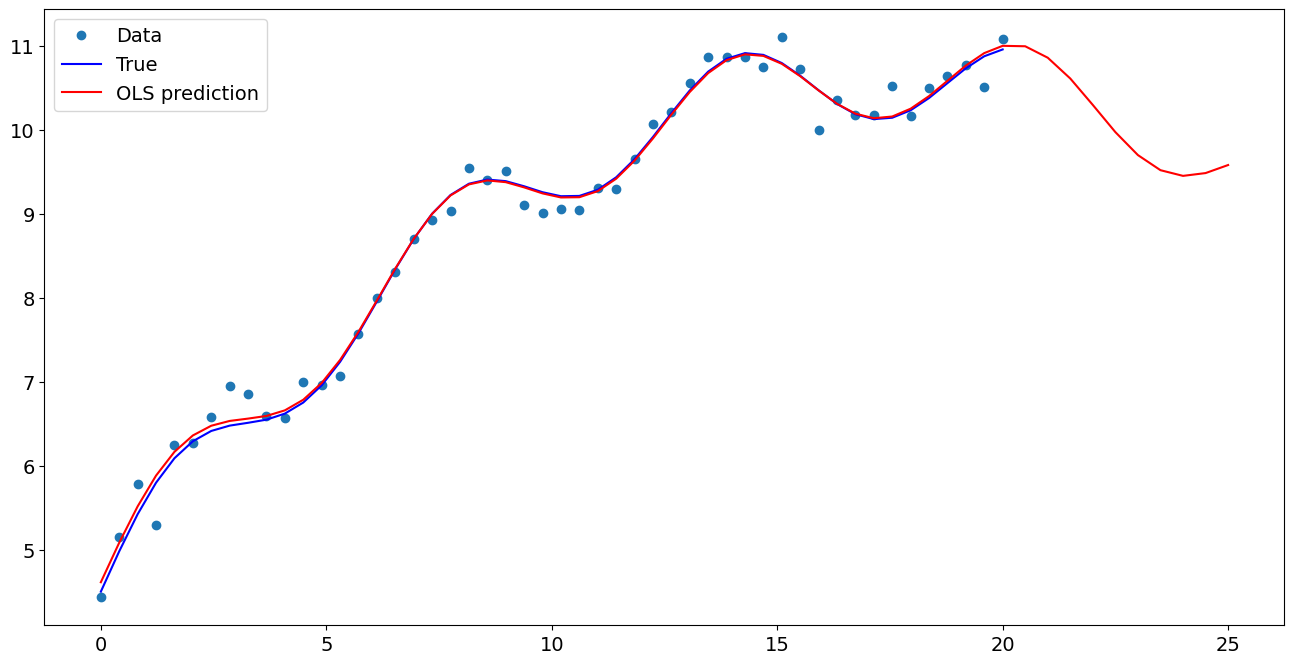

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(x1, y, "o", label="Data")
ax.plot(x1, y_true, "b-", label="True")
ax.plot(np.hstack((x1, x1n)), np.hstack((ypred, ynewpred)), "r", label="OLS prediction")
ax.legend(loc="best")

## Predicting with Formulas

Using formulas can make both estimation and prediction a lot easier

In [8]:
from statsmodels.formula.api import ols

data = {"x1": x1, "y": y}

res = ols("y ~ x1 + np.sin(x1) + I((x1-5)**2)", data=data).fit()

We use the `I` to indicate use of the Identity transform. Ie., we do not want any expansion magic from using `**2`

In [9]:
res.params

Intercept           5.088529
x1                  0.487225
np.sin(x1)          0.498051
I((x1 - 5) ** 2)   -0.019058
dtype: float64

Now we only have to pass the single variable and we get the transformed right-hand side variables automatically

In [10]:
res.predict(exog=dict(x1=x1n))

0    10.994525
1    10.858205
2    10.610334
3    10.295423
4     9.972062
5     9.698579
6     9.518755
7     9.451108
8     9.484360
9     9.580192
dtype: float64